# The project goal is to design a system which tells tells the species type using decision tree machine learning algorithm and visualizing it graphically.

## Data visualization,machine learning using decision tree classifier and tree visualization are done to reach the project goal.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

Displaying data:

In [4]:
df = pd.read_csv('iris.csv')

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Checking there is no null data:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Data visualization:

<Axes: >

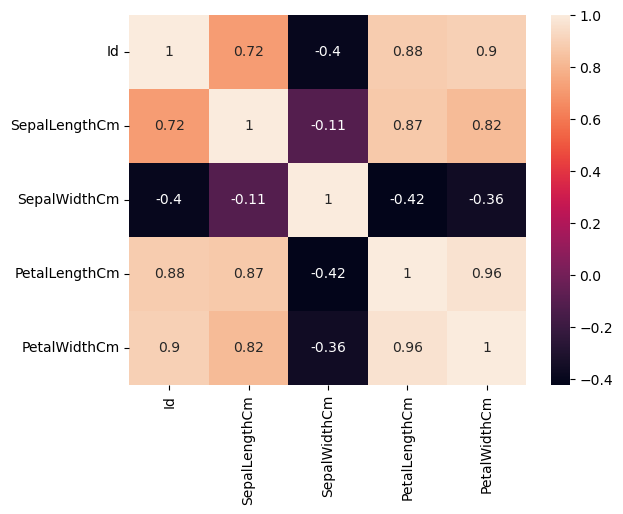

In [9]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

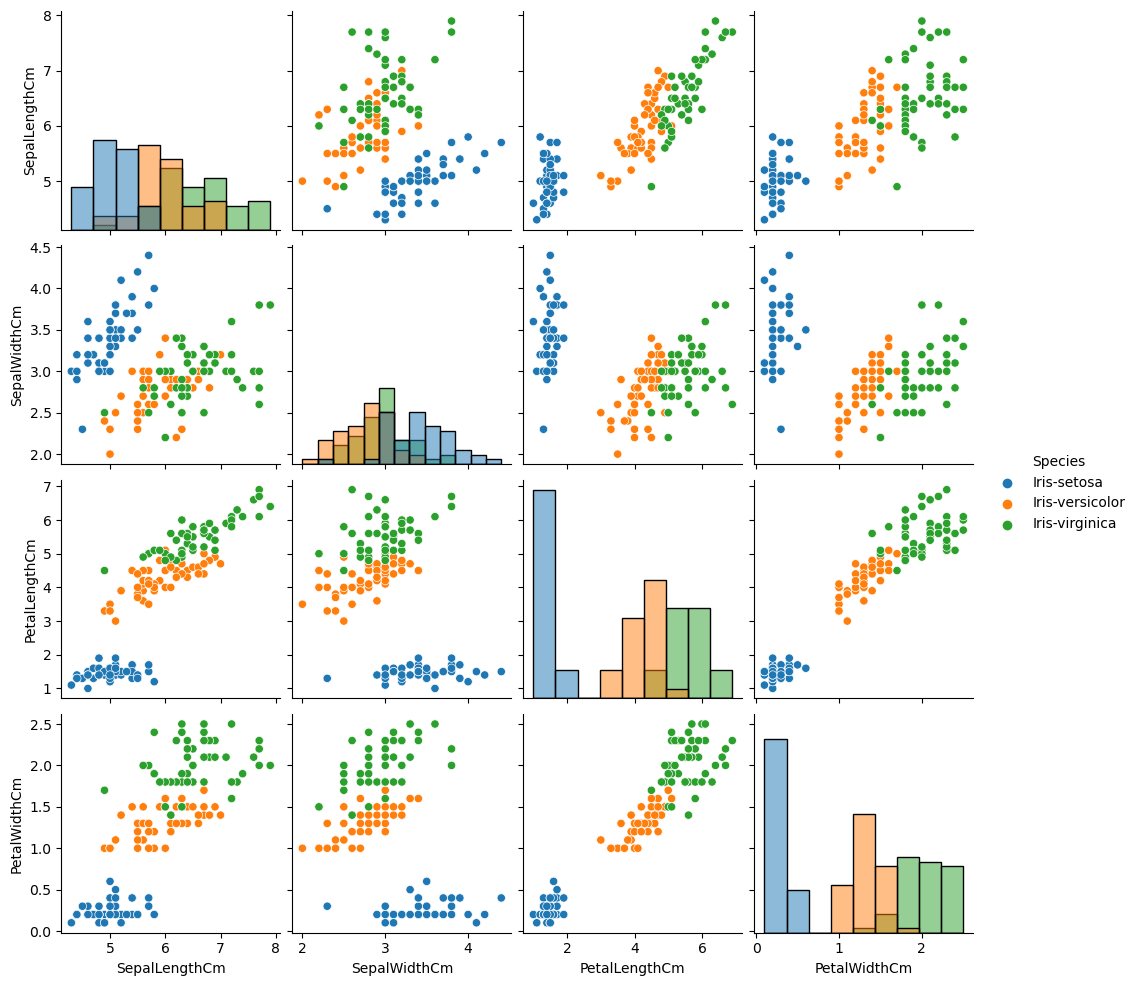

In [10]:
sns.pairplot(df.drop('Id', axis=1),hue='Species',diag_kind='hist')

In [22]:
df.groupby('Species').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


Conclusion:                                                                                                                     1-There is a strong correlation between a-sepal length and petal length b-sepal length and petal width c- very strong correlation between petal length and petal width.                                                                                2-There is a weak correlation between a-sepal width and petal length b-sepal width and petal width c- very weak correlation between sepal length and sepal width.                                                                                           3- In petal width, petal length and sepal length Iris-virginica has the highest average values while Iris Setosa has the least average values.                                                                                                                 4- In sepal width, Iris Setosa has the highest average values while Iris-versicolor has the least average values.

# Machine learning using decision tree classifier:

Training and fitting data:

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
df.drop('Id', axis=1, inplace = True) #Dropping ID as it has no affect on type of species

In [13]:
x= df.drop('Species',axis=1)
y=df['Species']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [15]:
dtree = DecisionTreeClassifier()

In [16]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

Predicting the tested data:

In [17]:
pdtree=dtree.predict(x_test)

Evaluation:

In [18]:
from sklearn import metrics

In [19]:
print(metrics.classification_report(y_test,pdtree))
print(metrics.confusion_matrix(y_test,pdtree))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.95      0.95      0.95        20
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


# Visualization of the tree:

In [20]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydot 

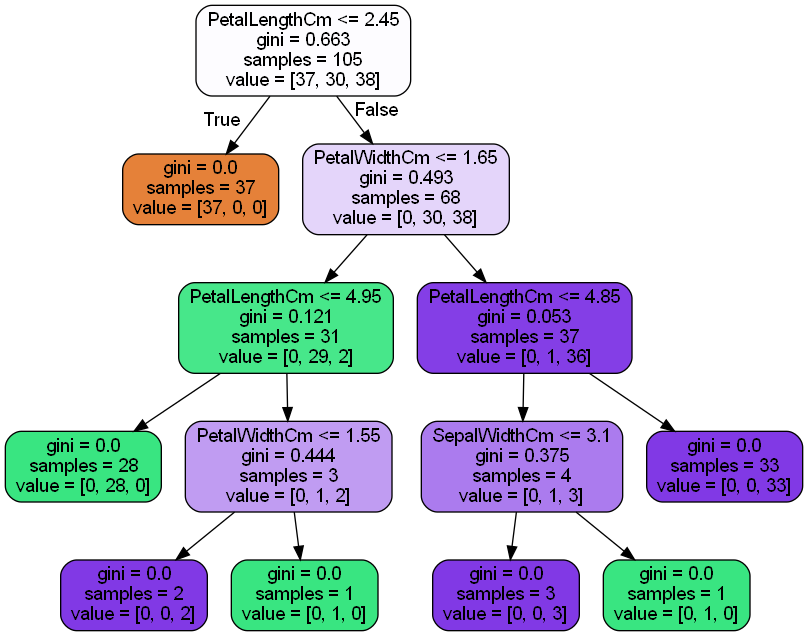

In [21]:
features = list(df.columns[:-1])

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  